In [ ]:
!nvidia-smi

Sun Jun 18 06:33:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
cd '/content'

/content


In [ ]:
!unzip "drive/MyDrive/Brainhack/train.zip" -d "train_images"

!unzip "drive/MyDrive/Brainhack/train_labels.zip" -d "train_labels"

!unzip "drive/MyDrive/Brainhack/val.zip" -d "val_images"

!unzip "drive/MyDrive/Brainhack/val_labels.zip" -d "val_labels"

!unzip "drive/MyDrive/Brainhack/test.zip" -d "test_images"

!unzip "drive/MyDrive/Brainhack/suspects.zip" -d "suspects"

In [ ]:
train_images_path = '/content/train_images'
train_labels_path = '/content/train_labels'
val_images_path = '/content/val_images'
val_labels_path = '/content/val_labels'

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os

train_crops_path = "train_crops"
num_plushies = 200
os.mkdir(train_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(train_crops_path, str(i)))

In [ ]:
val_crops_path = "val_crops"
num_plushies = 10
os.mkdir(val_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(val_crops_path, str(i)))

# Crop the plushie from images using bounding boxes


In [ ]:
# import torchvision.transforms as tt
# import torchvision.transforms.v2 as tt2
# import torch

# class BGR2RGB:
#     def __call__(self, image):
#         #image = image.numpy()
#         #print(f'type of image {type(image)}')
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         #image = torch.from_numpy(image)
#         return image

# class Auto_Augment():
#     def __init__(self):
#         self.transform = tt.Compose([BGR2RGB(),
#                         tt.ToTensor(),
#                         tt.ConvertImageDtype(torch.uint8),
#                         tt.AutoAugment()
#                         ])

#     def __call__(self, image):
#         image = self.transform(image).numpy()
#         image = np.transpose(image, (1,2,0))
#         #print(image.shape)
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#         return image

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = train_images_path
labels_path = train_labels_path
annotated_images_path = train_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
    # print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)

        # #augmented image 1
        # transform = Auto_Augment()
        # augmented_img = transform(cropped_img)
        # annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        # cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), augmented_img)

        # #augmented image 2
        # transform = Auto_Augment()
        # augmented_img = transform(cropped_img)
        # annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        # cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), augmented_img)


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = val_images_path
labels_path = val_labels_path
annotated_images_path = val_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
#     print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


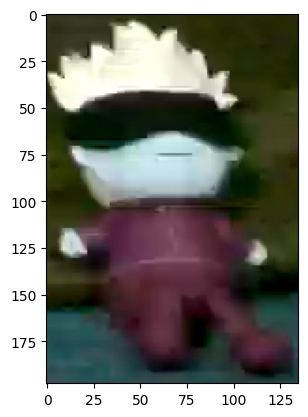

In [ ]:
image = cv2.imread(f'{train_crops_path}/0/0_22.png')
plt.imshow(image)

# Creating LFW file format for labelling matches and mismatches

# Creating LFW File for Triplet Loss
class1 anchor positive class2 negative <br>
1 image_0001 image_0010 26 image_0009

In [ ]:
import os
import random

counts = {}

crops_path = train_crops_path
num_plushies = 200

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_triplet(plushie, anchor, positive, plushie1, negative):
    line = f"{plushie} {anchor} {positive} {plushie1} {negative}\n"
    lines.append(line)


#hyperparameter
len_data = 100000

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))
    plushie1 = random.choice(list(counts.keys()))

    while plushie == plushie1:
      plushie1 = random.choice(list(counts.keys()))

    anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{anchor_num}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{positive_num}.png") and os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{negative_num}.png")):
        print(anchor_num, positive_num, plushie, negative_num, plushie1)
        anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])

    add_triplet(plushie, anchor_num, positive_num, plushie1, negative_num)


f = open("plushie_pairs_train.txt", "a")
f.writelines(lines)
f.close()

{0: 134, 1: 130, 2: 132, 3: 130, 4: 130, 5: 130, 6: 122, 7: 132, 8: 132, 9: 128, 10: 132, 11: 130, 12: 130, 13: 128, 14: 132, 15: 130, 16: 132, 17: 130, 18: 132, 19: 130, 20: 130, 21: 132, 22: 130, 23: 132, 24: 130, 25: 130, 26: 130, 27: 130, 28: 128, 29: 130, 30: 130, 31: 130, 32: 130, 33: 132, 34: 132, 35: 130, 36: 130, 37: 130, 38: 130, 39: 130, 40: 130, 41: 128, 42: 130, 43: 130, 44: 132, 45: 130, 46: 132, 47: 126, 48: 132, 49: 130, 50: 130, 51: 130, 52: 128, 53: 132, 54: 130, 55: 132, 56: 132, 57: 130, 58: 130, 59: 130, 60: 130, 61: 126, 62: 130, 63: 128, 64: 130, 65: 130, 66: 132, 67: 132, 68: 130, 69: 130, 70: 133, 71: 132, 72: 132, 73: 130, 74: 126, 75: 128, 76: 130, 77: 130, 78: 130, 79: 126, 80: 126, 81: 128, 82: 128, 83: 126, 84: 128, 85: 128, 86: 128, 87: 112, 88: 112, 89: 112, 90: 116, 91: 124, 92: 124, 93: 116, 94: 130, 95: 126, 96: 114, 97: 122, 98: 122, 99: 112, 100: 120, 101: 112, 102: 122, 103: 120, 104: 114, 105: 122, 106: 120, 107: 108, 108: 114, 109: 118, 110: 120,

# LFW for Validation Set Triplet Loss

In [ ]:
import os
import random

counts = {}

crops_path = val_crops_path
num_plushies = 10

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_triplet(plushie, anchor, positive, plushie1, negative):
    line = f"{plushie} {anchor} {positive} {plushie1} {negative}\n"
    lines.append(line)


#hyperparameter
len_data = 10000

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))
    plushie1 = random.choice(list(counts.keys()))

    while plushie == plushie1:
      plushie1 = random.choice(list(counts.keys()))

    anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{anchor_num}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{positive_num}.png") and os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{negative_num}.png")):
        print(anchor_num, positive_num, plushie, negative_num, plushie1)
        anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])

    add_triplet(plushie, anchor_num, positive_num, plushie1, negative_num)


f = open("plushie_pairs_val.txt", "a")
f.writelines(lines)
f.close()

{0: 179, 1: 177, 2: 169, 3: 163, 4: 163, 5: 163, 6: 166, 7: 169, 8: 173, 9: 177}


# Helper Function

In [ ]:
import torch
import matplotlib.pyplot as plt

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def show_img(img1, img2):
    axs = plt.figure(figsize=(9, 9)).subplots(1, 2)
    axs[0].imshow(img1)
    axs[1].imshow(img2)


def accuracy(preds, labels):
    preds = torch.flatten(preds)
    return torch.sum(preds == labels).item() / len(labels)


class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

    def __len__(self):
        return len(self.dl)

# Transforming the Data
Resizing the images and preprocessing

In [ ]:
import torchvision.transforms as tt
import cv2

class BGR2RGB:
    def __call__(self, image):
        #image = image.numpy()
        #print(f'type of image {type(image)}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = torch.from_numpy(image)
        return image

class SquarePad:
    def __call__(self, image):
        max_wh = max(image.shape[:2])
        p_left, p_top = [(max_wh - s) // 2 for s in image.shape[:2]]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.shape[:2], [p_left, p_top])]
        return cv2.copyMakeBorder(image, p_top, p_bottom, p_left, p_right, cv2.BORDER_CONSTANT, None, value = 0)


class Resize():
    def __init__(self, output_size=(128, 128)):
        assert isinstance(output_size, (tuple))
        self.output_size = output_size

    def __call__(self, image):
        return cv2.resize(image, self.output_size, interpolation = cv2.INTER_LINEAR)

class Transforms:
    def __init__(self):
        self.transform = tt.Compose([BGR2RGB(),
                        SquarePad(),
                        Resize((128, 128)),
                        tt.ToTensor(),
                        tt.Normalize(0, 0.5)])

    def __call__(self, image):
        return self.transform(image)


# Creating the Model

# MODEL FOR TRIPLET LOSS

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
from torch import cat
import torch.nn as nn
import torch.nn.functional as F

class SiameseNetwork(nn.Module):
    """
        https://github.com/pytorch/examples/tree/main/siamese_network

        BCE Loss
    """
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.resnet = resnet50(ResNet50_Weights.DEFAULT)

        for ct, child in enumerate(self.resnet.children()):
            if ct < 2:
                for param in child.parameters():
                    param.requires_grad = False


        self.fc_in_features = self.resnet.fc.in_features

        # remove the last layer of resnet18 (linear layer which is before avgpool layer)
        self.resnet = nn.Sequential(*(list(self.resnet.children())[:-1]))

        # add linear layers to compare between the features of the two images
        self.fc = nn.Sequential(
            nn.Linear(self.fc_in_features, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 4), #MIGHT WANT A MORE COMPLEX VECTOR OUTPUT
        )



    def get_embeddings(self, x):
        output = self.resnet(x)
        output = output.view(output.size()[0], -1)
        return output

    def forward(self, input1, input2, input3=None):
        output1 = self.get_embeddings(input1)
        output1 = self.fc(output1)
        output1 = F.normalize(output1)
        output2 = self.get_embeddings(input2)
        output2 = self.fc(output2)
        output2 = F.normalize(output2)

        #for training
        if input3 is not None:
          output3 = self.get_embeddings(input3)
          output3 = self.fc(output3)
          output3 = F.normalize(output3)
        else:
          output3 = None
        #output = cat((output1, output2), 1)
        #output = self.fc(output) #the output of the Siamese Network is a number;

        #return output
        return output1, output2, output3

# Creating Dataset for Triplet Loss

In [ ]:
import os
import matplotlib.pyplot as plt

from PIL import Image
import cv2

from torch.utils.data import Dataset

class PlushieTrainDataset(Dataset):

    def __init__(self, filepath, img_dir, transform=None):
        self.samples = []
        self.img_dir = img_dir
        self.transform = transform

        with open(filepath, 'r') as f:
            self.samples = [line.strip() for line in f]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, i):
        line = self.samples[i].split()
        anchor_name, anchor_num, positive_num, negative_name, negative_num = line

        anchor = cv2.imread(os.path.join(self.img_dir, str(anchor_name), f"{anchor_name}_{anchor_num}.png"))
        positive = cv2.imread(os.path.join(self.img_dir, anchor_name, f"{anchor_name}_{positive_num}.png"))
        negative = cv2.imread(os.path.join(self.img_dir, negative_name, f"{negative_name}_{negative_num}.png"))

        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative


# Training the Model

Cosine Distance Loss

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn

def infer(model, img, target, transform = None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if transform is not None:
      output1, output2 = transform(img).unsqueeze(0), transform(target).unsqueeze(0)
    else:
      output1, output2 = img, target
    #generate the embedding vectors using loaded model
    output1,output2,_ = model(output1.to(device),output2.to(device))

    #calculating euclidean distance and determining if match
    cosine_distance = 1 - F.cosine_similarity(output1, output2)
    #print(f'cosine distance {cosine_distance}')
    #print(f'cosine distance shape {cosine_distance.shape}')

    pred = torch.Tensor(np.array([1 if dist < 0.5 else 0 for dist in cosine_distance]))

    return pred, cosine_distance

# TRIPLET LOSS

Triplet Loss

In [ ]:
os.chdir('/content')

In [ ]:
def loss_batch(model, loss_func, anchor, positive=None, negative=None, opt=None, metric=None): # Update model weights and return metrics given xb, yb, model



    #if it is in evaluation phase, no need to calculate triplet loss
    metric_result = None
    if metric is not None:
        #print('INFERRING POSITIVE')
        pos_pred, _ = infer(model, anchor, positive) #ISSUE -> RESULT IS AN INTEGER, MIGHT BE DUE TO NUMPY CONVERSION
        pos_pred = pos_pred.cuda()
        #print('INFERRING NEGATIVE')
        neg_pred, _ = infer(model, anchor, negative) #ISSUE -> RESULT IS AN INTEGER, MIGHT BE DUE TO NUMPY CONVERSION
        neg_pred = neg_pred.cuda()
        result = torch.cat((pos_pred,neg_pred)).cuda()
        pos_label = torch.from_numpy(np.ones(len(positive)))
        neg_label = torch.from_numpy(np.zeros(len(negative)))
        label = torch.cat((pos_label, neg_label)).cuda()
        #print(f'results {result}') #ISSUE WITH RESULT -> RESULT IS AN INTEGER
        metric_result = metric(result, label)

    preds = model(anchor, positive, negative)
    #print(f'shape of model output {preds[0]}')
    loss = loss_func(preds[0], preds[1], preds[2]) #triplet loss

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()



    return loss.item(), len(anchor), metric_result


def fit(epochs, model, loss_func, train_dl, val_dl, opt_func=torch.optim.SGD, lr=0.01, decay = 0.00001, early_stopper=None, metric=None):
    train_losses, val_losses, val_metrics = [] , [], []


    opt = opt_func(model.parameters(), lr=lr, weight_decay = decay)
    earlyStopper = early_stopper(patience=8, min_delta=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.0005)
    for epoch in range(1, epochs+1):
        total_train_loss = 0
        model.train() # Setting for pytorch - training mode
        for anchor,positive,negative in train_dl:
            train_loss, _, _ = loss_batch(model, loss_func, anchor, positive=positive, negative=negative, opt=opt) # update weights
            total_train_loss += train_loss
            print(f'train loss{train_loss}')
        scheduler.step()
        model.eval() # Setting - eval mode
        val_loss, total, val_metric = evaluate(model, loss_func, val_dl, metric)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)


        if metric is None:
            print(f'length of train_dl {len(train_dl)}')
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
            epoch, total_train_loss/len(train_dl), val_loss))
        else:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}".format(
            epoch, total_train_loss/len(train_dl), val_loss, metric.__name__, val_metric))
        if earlyStopper.early_stop(val_loss):
            break
    return train_losses, val_losses, val_metrics


def evaluate(model, loss_func, val_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, anchor, positive=positive, negative=negative, metric=metric) for anchor, positive, negative in val_dl]

        losses, nums, metrics = zip(*results)
        total = np.sum(nums)

        avg_loss = np.sum(np.multiply(losses, nums)) / total

        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total

        print(f'validation loss {avg_loss}')

        return avg_loss, total, avg_metric

class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

train_filepath = "plushie_pairs_train.txt"
train_img_dir = train_crops_path
val_filepath = "plushie_pairs_val.txt"
val_img_dir = val_crops_path
train_bs = 256
test_bs = 32
num_epochs = 25
lr = 0.001
weight_decay = 0.0001 #regularisation

torch.autograd.set_detect_anomaly(True)

transform = Transforms()
train_dataset = PlushieTrainDataset(filepath=train_filepath, img_dir=train_img_dir, transform=transform)
valid_dataset = PlushieTrainDataset(filepath=val_filepath, img_dir=val_img_dir, transform=transform)
network = SiameseNetwork()


print("The length of Train set is {}".format(len(train_dataset)))
print("The length of Valid set is {}".format(len(valid_dataset)))

train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=train_bs, shuffle=True, num_workers=4)
val_dl = torch.utils.data.DataLoader(valid_dataset, batch_size=test_bs, shuffle=True, num_workers=4)

device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(network, device)

criterion = (nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - F.cosine_similarity(x, y, dim = 1)))
#criterion = torch.nn.TripletMarginLoss()
optimizer = torch.optim.SGD
early_stopper = EarlyStopper


train_losses, val_losses, val_metrics = fit(num_epochs, network, criterion,
                                        train_dl, val_dl, optimizer, lr, weight_decay, early_stopper, accuracy)

torch.save(network, '/content/drive/MyDrive/Brainhack/models/reid_resnet50_cosine_embedding_005.pt')

25


Text(0.5, 1.0, 'epochs: 25, train_set: 50000, val_set: 5000, resnet50, lr: 0.001, margin: 1.0')

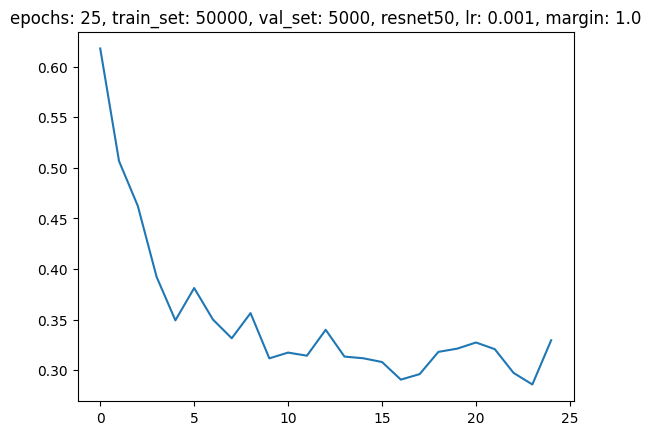

In [ ]:
import matplotlib.pyplot as plt
print(len(train_losses))
plt.plot(train_losses)
plt.title(f'epochs: {num_epochs}, train_set: {50000}, val_set: {5000}, resnet50, lr: {lr}, margin: {criterion.margin}')

Text(0.5, 1.0, 'val loss')

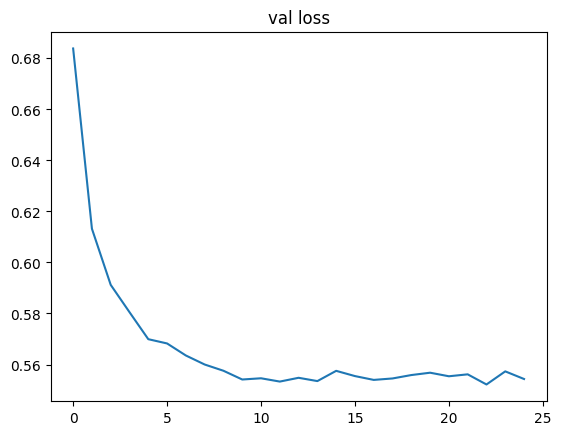

In [ ]:
plt.plot(val_losses)
plt.title('val loss')

In [ ]:
train_losses1 = ['%.4f' % elem for elem in train_losses]
val_losses1 = ['%.4f' % elem for elem in val_losses]
val_metrics1 = ['%.4f' % elem for elem in val_metrics]
print (f'train {train_losses1}')
print (f'train {val_losses1}')
print (f'train {val_metrics1}')

train ['0.6179', '0.5067', '0.4623', '0.3923', '0.3493', '0.3812', '0.3501', '0.3316', '0.3564', '0.3117', '0.3174', '0.3143', '0.3399', '0.3135', '0.3118', '0.3081', '0.2907', '0.2961', '0.3181', '0.3213', '0.3274', '0.3208', '0.2973', '0.2859', '0.3296']
train ['0.6839', '0.6132', '0.5912', '0.5805', '0.5699', '0.5683', '0.5635', '0.5600', '0.5576', '0.5541', '0.5546', '0.5533', '0.5548', '0.5535', '0.5575', '0.5555', '0.5540', '0.5545', '0.5559', '0.5568', '0.5554', '0.5561', '0.5522', '0.5573', '0.5543']
train ['0.6534', '0.6927', '0.7063', '0.7133', '0.7216', '0.7233', '0.7245', '0.7292', '0.7310', '0.7321', '0.7344', '0.7337', '0.7328', '0.7339', '0.7311', '0.7333', '0.7333', '0.7320', '0.7317', '0.7311', '0.7332', '0.7327', '0.7329', '0.7331', '0.7331']


# Evaluating on Test Set

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Brainhack')

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.2/611.2 kB 26.2 MB/s eta 0:00:00


In [ ]:
import torch
import cv2
import csv
import pandas as pd
import gdown
#from reID.model import SiameseNetwork
#from reID.inference import infer
#from reID.transforms import Transforms
import os
from ultralytics import YOLO
from PIL import Image

yolo_url = "https://drive.google.com/file/d/1-YNxQ1EORYLcKVnKC1V5GZSB6aov0Ivn/view?usp=sharing"
yolo_output = "best.pt"
#gdown.download( yolo_url, yolo_output, quiet=False)
yolo_model = YOLO('/content/drive/MyDrive/Brainhack/TIL_Qualifiers_OD_YOLOV8.pt') #loading trained YOLO

#reid_model = torch.load('/content/drive/MyDrive/Brainhack/reid_resnet50_cosine_embedding_001.pt')
reid_model = network
reid_model.eval()

'''
reid_model = SiameseNetwork()
reid_url = "https://drive.google.com/file/d/1MSUtLHjFWsUU6KIoI59C1fl-DmpSRU27/view?usp=sharing"
reid_output = "/content/drive/MyDrive/Brainhack/reid_model_triplet4.pt" #loading trained reID
#gdown.download(reid_url, reid_output, quiet=False)
reid_model.load_state_dict(torch.load(reid_output))
reid_model.cuda()
'''
submission_list = []
test_dir = "/content/test_images"
suspect_dir = "/content/suspects/content/drive/Shareddrives/ZINDI Data Science/ADPL/Competition Data/CV/Data Prep/Test (0-1599)/merged/crops"

def detect(image_name):
    """

    """
    print(image_name)
    image_path = os.path.join(test_dir, image_name)
    suspect_path = os.path.join(suspect_dir, image_name)
    objects_detected = []
    #print(suspect_path)
    img = cv2.imread(image_path)
    #print(f'hi {type(img)}')
    suspect = cv2.imread(suspect_path)
    #print(img)
    #suspect = Image.fromarray(suspect)
    results = yolo_model(img)
    #print(f'results {results[0]}')
    boxes = results[0].boxes


    for box in boxes:
      #t = Transforms()
      confidence = box.conf.tolist() #confidence level
      x1n,y1n,x2n,y2n = torch.squeeze(box.xyxyn).tolist()
      x1,y1,x2,y2 = torch.squeeze(box.xyxy).tolist()
      # [[1,2], [2,3]] -> (2,2)
      #print(int(x1),int(y1),int(x2),y2)
      plushie = img[int(y1):int(y2), int(x1):int(x2)]

      #plushie = Image.fromarray(plushie)

      #print(type(suspect))

      #print(plushie.shape())
      classification, _ = infer(reid_model, plushie, suspect, Transforms())
      objects_detected.append({'Image_ID': image_name[:-4], 'class': classification.item(), 'confidence': confidence[0], 'ymin':y1n, 'xmin':x1n, 'ymax':y2n, 'xmax':x2n })
    return objects_detected


for image in os.listdir(test_dir):
        submit = detect(image)
        for obj in submit:
            submission_list.append(obj)

submission_df = pd.DataFrame(submission_list)
submission_df.to_csv('results/reid_resnet50_cosine_embedding_005.csv', index=False)



# with open('', 'w', newline='') as f:
#     writer = csv.writer(f)

image_1589.png



0: 384x640 3 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 toys, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0366.png



0: 384x640 1 toy, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1501.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1526.png



0: 384x640 1 toy, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0755.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0004.png



0: 384x640 3 toys, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1382.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0038.png



0: 384x640 3 toys, 9.7ms
Speed: 2.5ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0155.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0056.png



0: 384x640 1 toy, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0268.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1244.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0462.png



0: 384x640 3 toys, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0046.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0879.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0319.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0212.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0007.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1107.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0518.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0378.png



0: 384x640 2 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1063.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1346.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1126.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1037.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0208.png



0: 384x640 1 toy, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1308.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0606.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1221.png



0: 384x640 3 toys, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1454.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0903.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1528.png



0: 384x640 3 toys, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0820.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0109.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0503.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1462.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0847.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0859.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1484.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0291.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0429.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0253.png



0: 384x640 2 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0712.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1167.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1398.png



0: 384x640 1 toy, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0284.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0345.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0203.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0191.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1564.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0412.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0651.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1190.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0517.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0338.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1517.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1207.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0700.png



0: 384x640 3 toys, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0968.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1240.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


image_0779.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0342.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0792.png



0: 384x640 3 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0502.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0998.png



0: 384x640 3 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0200.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1093.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0965.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1195.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1538.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0276.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0375.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0589.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1134.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0084.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1098.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0016.png



0: 384x640 3 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0245.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0520.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0544.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0637.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1294.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1108.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0962.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0584.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0940.png



0: 384x640 1 toy, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1217.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1426.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1447.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0938.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1247.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0074.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1303.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0303.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0024.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1329.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0097.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1319.png



0: 384x640 3 toys, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0324.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1075.png



0: 384x640 3 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1181.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1448.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0161.png



0: 384x640 2 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1449.png



0: 384x640 3 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0926.png



0: 384x640 2 toys, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0597.png



0: 384x640 2 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1079.png



0: 384x640 2 toys, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0206.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0551.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1412.png



0: 384x640 3 toys, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0057.png



0: 384x640 3 toys, 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0947.png



0: 384x640 3 toys, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0955.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0128.png



0: 384x640 1 toy, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0539.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0231.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1525.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0500.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1110.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0213.png



0: 384x640 3 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0110.png



0: 384x640 2 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0341.png



0: 384x640 2 toys, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1187.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0207.png



0: 384x640 2 toys, 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1390.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0587.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1535.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0585.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1466.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0239.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0021.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1012.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0488.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1155.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0159.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1097.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0678.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0722.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0925.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1162.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1373.png



0: 384x640 1 toy, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0334.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1358.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1001.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1170.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0999.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1515.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0085.png



0: 384x640 1 toy, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0409.png



0: 384x640 3 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0766.png



0: 384x640 3 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1095.png



0: 384x640 2 toys, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0604.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1306.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0841.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0958.png



0: 384x640 2 toys, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1321.png



0: 384x640 2 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1335.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1026.png



0: 384x640 1 toy, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1360.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1498.png



0: 384x640 1 toy, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0135.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0670.png



0: 384x640 2 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0272.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0596.png



0: 384x640 3 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1209.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1064.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1356.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0562.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0112.png



0: 384x640 3 toys, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0140.png



0: 384x640 2 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0407.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1100.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0895.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1362.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0636.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0991.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0680.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0082.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1374.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0379.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1545.png



0: 384x640 3 toys, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0265.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1035.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0364.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0065.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1202.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0929.png



0: 384x640 3 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0314.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0467.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1284.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0312.png



0: 384x640 3 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0824.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1350.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0524.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0936.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0644.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0389.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0624.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1533.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0468.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1295.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0447.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0988.png



0: 384x640 1 toy, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0198.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1045.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1040.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0718.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0093.png



0: 384x640 1 toy, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0485.png



0: 384x640 3 toys, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0553.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0423.png



0: 384x640 2 toys, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0280.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0989.png



0: 384x640 1 toy, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1394.png



0: 384x640 1 toy, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1516.png



0: 384x640 2 toys, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0974.png



0: 384x640 1 toy, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0107.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0557.png



0: 384x640 3 toys, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0864.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1569.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0005.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1271.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1164.png



0: 384x640 2 toys, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1403.png



0: 384x640 2 toys, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0665.png



0: 384x640 3 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1081.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0575.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0970.png



0: 384x640 3 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0729.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0425.png



0: 384x640 3 toys, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0506.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0167.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0121.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1071.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1553.png



0: 384x640 1 toy, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0138.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0384.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0099.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0629.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0679.png



0: 384x640 1 toy, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1289.png



0: 384x640 3 toys, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0576.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1333.png



0: 384x640 1 toy, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1027.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0807.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0457.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0008.png



0: 384x640 1 toy, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1256.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0377.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0819.png



0: 384x640 3 toys, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_1169.png



0: 384x640 2 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1125.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0494.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0473.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0846.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0478.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1274.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1312.png



0: 384x640 3 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0274.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0014.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0993.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0564.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1076.png



0: 384x640 2 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0580.png



0: 384x640 3 toys, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0087.png



0: 384x640 2 toys, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0529.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0179.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1047.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1220.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1101.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0735.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0487.png



0: 384x640 2 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1393.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0957.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1273.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1175.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0994.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1242.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0471.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1348.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0060.png



0: 384x640 3 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1474.png



0: 384x640 3 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1556.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0641.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1171.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1014.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0884.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0176.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0997.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0032.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0175.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0716.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0987.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_0083.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1109.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0079.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0511.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0692.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1112.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0759.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0054.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0298.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1185.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0363.png



0: 384x640 3 toys, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0898.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0547.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1296.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1305.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0330.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1176.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0104.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0664.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0687.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1085.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0812.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0764.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1291.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0961.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1132.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0020.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1153.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0432.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0131.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0787.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0030.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0491.png



0: 384x640 1 toy, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1422.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1359.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0356.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0415.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0747.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0622.png



0: 384x640 2 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1251.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1048.png



0: 384x640 2 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0626.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0701.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0215.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0263.png



0: 384x640 1 toy, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0868.png



0: 384x640 1 toy, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0061.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1457.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1158.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0797.png



0: 384x640 2 toys, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1364.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0601.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0483.png



0: 384x640 2 toys, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0669.png



0: 384x640 1 toy, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0796.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0100.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1111.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0359.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0275.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0686.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0528.png



0: 384x640 3 toys, 9.2ms
Speed: 2.4ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0569.png



0: 384x640 1 toy, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0730.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0037.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0866.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1592.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1150.png



0: 384x640 3 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1598.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0486.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1038.png



0: 384x640 3 toys, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0001.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1270.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0638.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1502.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0798.png



0: 384x640 1 toy, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0501.png



0: 384x640 3 toys, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0559.png



0: 384x640 2 toys, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1338.png



0: 384x640 2 toys, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0113.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0783.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0647.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0009.png



0: 384x640 1 toy, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0117.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0595.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0315.png



0: 384x640 3 toys, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1435.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0368.png



0: 384x640 1 toy, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0892.png



0: 384x640 2 toys, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0185.png



0: 384x640 1 toy, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0260.png



0: 384x640 2 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0620.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1133.png



0: 384x640 3 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1313.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0151.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0542.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0758.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1418.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0951.png



0: 384x640 2 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1361.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0880.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0813.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0833.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0950.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1049.png



0: 384x640 3 toys, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0784.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0904.png



0: 384x640 2 toys, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0667.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0282.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0959.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0603.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1172.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0536.png



0: 384x640 2 toys, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0252.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1588.png



0: 384x640 3 toys, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0443.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_1383.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0226.png



0: 384x640 2 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0043.png



0: 384x640 2 toys, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1120.png



0: 384x640 1 toy, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0739.png



0: 384x640 3 toys, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0607.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0114.png



0: 384x640 3 toys, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0888.png



0: 384x640 2 toys, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0731.png



0: 384x640 3 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1228.png



0: 384x640 3 toys, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1530.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0091.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1491.png



0: 384x640 1 toy, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0673.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0129.png



0: 384x640 1 toy, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1552.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1114.png



0: 384x640 3 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1456.png



0: 384x640 1 toy, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1200.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0532.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0834.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0181.png



0: 384x640 2 toys, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1546.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0990.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1337.png



0: 384x640 3 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0571.png



0: 384x640 4 toys, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0945.png



0: 384x640 2 toys, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0912.png



0: 384x640 3 toys, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0027.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1226.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1279.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0492.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0737.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0496.png



0: 384x640 3 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0441.png



0: 384x640 3 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0452.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1283.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1072.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1269.png



0: 384x640 2 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0549.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0322.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0668.png



0: 384x640 1 toy, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0028.png



0: 384x640 1 toy, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1074.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0164.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1349.png



0: 384x640 2 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0493.png



0: 384x640 3 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1128.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1225.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1563.png



0: 384x640 3 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0946.png



0: 384x640 1 toy, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0152.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0621.png



0: 384x640 1 toy, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0763.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0650.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0916.png



0: 384x640 3 toys, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0023.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0402.png



0: 384x640 1 toy, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0388.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0450.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1174.png



0: 384x640 3 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1042.png



0: 384x640 3 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0721.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0283.png



0: 384x640 1 toy, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0278.png



0: 384x640 1 toy, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0886.png



0: 384x640 3 toys, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1442.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1458.png



0: 384x640 3 toys, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1468.png



0: 384x640 3 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0414.png



0: 384x640 3 toys, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1068.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0618.png



0: 384x640 3 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1506.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1290.png



0: 384x640 2 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0325.png



0: 384x640 1 toy, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0826.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0696.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1160.png



0: 384x640 1 toy, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1213.png



0: 384x640 2 toys, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0365.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1301.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0033.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1551.png



0: 384x640 2 toys, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0139.png



0: 384x640 2 toys, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0935.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1351.png



0: 384x640 3 toys, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0410.png



0: 384x640 2 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0891.png



0: 384x640 2 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0777.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0236.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1096.png



0: 384x640 2 toys, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1434.png



0: 384x640 2 toys, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1235.png



0: 384x640 3 toys, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0130.png



0: 384x640 2 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1355.png



0: 384x640 1 toy, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0225.png



0: 384x640 3 toys, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1377.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1420.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1410.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0761.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0750.png



0: 384x640 3 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1489.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0258.png



0: 384x640 2 toys, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0623.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0977.png



0: 384x640 2 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1343.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0301.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1584.png



0: 384x640 3 toys, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0639.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


image_0676.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0985.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0911.png



0: 384x640 1 toy, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1070.png



0: 384x640 2 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0867.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0695.png



0: 384x640 1 toy, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0034.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1322.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0242.png



0: 384x640 3 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0422.png



0: 384x640 3 toys, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1575.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0738.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0967.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0552.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0837.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0723.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0894.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0317.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0387.png



0: 384x640 3 toys, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1177.png



0: 384x640 3 toys, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0372.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0509.png



0: 384x640 3 toys, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0463.png



0: 384x640 3 toys, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0843.png



0: 384x640 3 toys, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0534.png



0: 384x640 3 toys, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0035.png



0: 384x640 2 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0069.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0292.png



0: 384x640 1 toy, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0062.png



0: 384x640 2 toys, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1198.png



0: 384x640 1 toy, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0119.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0390.png



0: 384x640 3 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0218.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0018.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0347.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0234.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0193.png



0: 384x640 3 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1237.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0382.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1590.png



0: 384x640 3 toys, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0790.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0196.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0937.png



0: 384x640 1 toy, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0811.png



0: 384x640 3 toys, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0448.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0538.png



0: 384x640 1 toy, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0404.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1453.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0270.png



0: 384x640 1 toy, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1327.png



0: 384x640 2 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1203.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0941.png



0: 384x640 3 toys, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0933.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0395.png



0: 384x640 3 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0160.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0799.png



0: 384x640 3 toys, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0480.png



0: 384x640 2 toys, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0848.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1007.png



0: 384x640 2 toys, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0523.png



0: 384x640 1 toy, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1131.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0530.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1136.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0141.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0362.png



0: 384x640 2 toys, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0217.png



0: 384x640 2 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0728.png



0: 384x640 1 toy, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0658.png



0: 384x640 1 toy, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0465.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0865.png



0: 384x640 2 toys, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1092.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1224.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0724.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1407.png



0: 384x640 2 toys, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1178.png



0: 384x640 3 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1088.png



0: 384x640 2 toys, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0331.png



0: 384x640 1 toy, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1594.png



0: 384x640 3 toys, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0438.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0685.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0354.png



0: 384x640 1 toy, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1492.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1414.png



0: 384x640 3 toys, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0943.png



0: 384x640 1 toy, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0247.png



0: 384x640 2 toys, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0920.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1436.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0521.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0461.png



0: 384x640 3 toys, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0656.png



0: 384x640 3 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0851.png



0: 384x640 3 toys, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1541.png



0: 384x640 3 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1399.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0778.png



0: 384x640 1 toy, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1378.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0406.png



0: 384x640 1 toy, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1583.png



0: 384x640 1 toy, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1367.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0978.png



0: 384x640 2 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0228.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1437.png



0: 384x640 2 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1154.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1385.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1039.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0006.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0436.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0890.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0142.png



0: 384x640 1 toy, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0699.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1261.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0264.png



0: 384x640 1 toy, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1438.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0856.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0805.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0875.png



0: 384x640 2 toys, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0546.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0244.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1314.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1576.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0329.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0838.png



0: 384x640 1 toy, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0857.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1411.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0386.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0081.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0394.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0385.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0396.png



0: 384x640 3 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1487.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0512.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0261.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1470.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0174.png



0: 384x640 2 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


image_0643.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0288.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0540.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0078.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0732.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0830.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0403.png



0: 384x640 2 toys, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0555.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1340.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0910.png



0: 384x640 1 toy, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1481.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0634.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0393.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1519.png



0: 384x640 2 toys, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0581.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1201.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0120.png



0: 384x640 2 toys, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0921.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0408.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1263.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1272.png



0: 384x640 3 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0183.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0355.png



0: 384x640 2 toys, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0248.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0749.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1424.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0835.png



0: 384x640 2 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1567.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0514.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0101.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0869.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1179.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1127.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0134.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1029.png



0: 384x640 2 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0971.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0367.png



0: 384x640 3 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0320.png



0: 384x640 3 toys, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0727.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1286.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1173.png



0: 384x640 1 toy, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1396.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0010.png



0: 384x640 1 toy, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1145.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0168.png



0: 384x640 3 toys, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0615.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1278.png



0: 384x640 3 toys, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1268.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1106.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0913.png



0: 384x640 2 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0694.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0567.png



0: 384x640 3 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0949.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0897.png



0: 384x640 3 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0773.png



0: 384x640 3 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0543.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0145.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0332.png



0: 384x640 2 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1388.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0815.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1057.png



0: 384x640 2 toys, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0427.png



0: 384x640 2 toys, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0309.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1124.png



0: 384x640 1 toy, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1482.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0011.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1371.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0015.png



0: 384x640 3 toys, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0845.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0545.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1534.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1318.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0171.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1090.png



0: 384x640 2 toys, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0822.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0115.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0720.png



0: 384x640 3 toys, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0437.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1472.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0475.png



0: 384x640 1 toy, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1304.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0642.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0948.png



0: 384x640 2 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0204.png



0: 384x640 3 toys, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0781.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1397.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0663.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1208.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0646.png



0: 384x640 1 toy, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0863.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0872.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0376.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0374.png



0: 384x640 3 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1387.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0588.png



0: 384x640 3 toys, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1050.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0531.png



0: 384x640 3 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0308.png



0: 384x640 3 toys, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0748.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0401.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0417.png



0: 384x640 3 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0444.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1352.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0579.png



0: 384x640 1 toy, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0666.png



0: 384x640 1 toy, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1257.png



0: 384x640 1 toy, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0416.png



0: 384x640 3 toys, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1566.png



0: 384x640 1 toy, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1560.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0862.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0241.png



0: 384x640 2 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1248.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0914.png



0: 384x640 2 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0703.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1580.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1196.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0561.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0182.png



0: 384x640 3 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0930.png



0: 384x640 1 toy, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0652.png



0: 384x640 3 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0337.png



0: 384x640 1 toy, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0055.png



0: 384x640 3 toys, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0956.png



0: 384x640 1 toy, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0449.png



0: 384x640 1 toy, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0632.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1461.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0583.png



0: 384x640 2 toys, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0369.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1080.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1077.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1227.png



0: 384x640 1 toy, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1532.png



0: 384x640 3 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0400.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1587.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0671.png



0: 384x640 1 toy, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0602.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0192.png



0: 384x640 2 toys, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1363.png



0: 384x640 1 toy, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1236.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0076.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1446.png



0: 384x640 3 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1581.png



0: 384x640 2 toys, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0725.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1427.png



0: 384x640 2 toys, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0541.png



0: 384x640 3 toys, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0577.png



0: 384x640 1 toy, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0855.png



0: 384x640 3 toys, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0690.png



0: 384x640 1 toy, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1311.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0878.png



0: 384x640 3 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0742.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1215.png



0: 384x640 3 toys, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1028.png



0: 384x640 1 toy, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1508.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1571.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0371.png



0: 384x640 2 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0186.png



0: 384x640 1 toy, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1317.png



0: 384x640 2 toys, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1103.png



0: 384x640 3 toys, 12.6ms
Speed: 2.3ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1582.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0059.png



0: 384x640 1 toy, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0249.png



0: 384x640 3 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0810.png



0: 384x640 1 toy, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0094.png



0: 384x640 2 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0162.png



0: 384x640 3 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0954.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1292.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0470.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1460.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0271.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0896.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0454.png



0: 384x640 3 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0563.png



0: 384x640 2 toys, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1229.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0499.png



0: 384x640 1 toy, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0802.png



0: 384x640 3 toys, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1129.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1000.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0421.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0049.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0745.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1299.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0440.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0025.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0336.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1238.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0504.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0979.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1082.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1287.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0413.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0693.png



0: 384x640 3 toys, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0064.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1219.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1011.png



0: 384x640 1 toy, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1091.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1485.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0709.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0871.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1357.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1336.png



0: 384x640 2 toys, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1417.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0850.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1053.png



0: 384x640 3 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0026.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0279.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1597.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0118.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0071.png



0: 384x640 2 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0326.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0876.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1450.png



0: 384x640 1 toy, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1430.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0688.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0180.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0928.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1252.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0036.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1003.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0482.png



0: 384x640 1 toy, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1408.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1041.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0590.png



0: 384x640 2 toys, 9.9ms
Speed: 2.2ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0533.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0633.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1245.png



0: 384x640 2 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0707.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0684.png



0: 384x640 2 toys, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1578.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0672.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1425.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0147.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1497.png



0: 384x640 2 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0430.png



0: 384x640 1 toy, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1151.png



0: 384x640 1 toy, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0022.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0756.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1467.png



0: 384x640 3 toys, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1005.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1503.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1548.png



0: 384x640 3 toys, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0287.png



0: 384x640 1 toy, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0361.png



0: 384x640 1 toy, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0302.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0768.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1459.png



0: 384x640 3 toys, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0210.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0170.png



0: 384x640 1 toy, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0927.png



0: 384x640 3 toys, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0381.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0158.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0172.png



0: 384x640 2 toys, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1023.png



0: 384x640 2 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1254.png



0: 384x640 3 toys, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0611.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0659.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0346.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_0550.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0654.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0357.png



0: 384x640 2 toys, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0823.png



0: 384x640 3 toys, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0635.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1577.png



0: 384x640 2 toys, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0122.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0821.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1165.png



0: 384x640 2 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1596.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0306.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0136.png



0: 384x640 2 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1339.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0708.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0497.png



0: 384x640 3 toys, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0908.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0594.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0806.png



0: 384x640 3 toys, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0235.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0229.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1062.png



0: 384x640 1 toy, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0125.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0031.png



0: 384x640 3 toys, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1323.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0697.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0273.png



0: 384x640 2 toys, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1094.png



0: 384x640 3 toys, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0149.png



0: 384x640 1 toy, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1013.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1505.png



0: 384x640 2 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0424.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1148.png



0: 384x640 1 toy, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1514.png



0: 384x640 1 toy, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0214.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1585.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0613.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0586.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1281.png



0: 384x640 3 toys, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0481.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0599.png



0: 384x640 2 toys, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1416.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1559.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0304.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0116.png



0: 384x640 1 toy, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0706.png



0: 384x640 1 toy, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1262.png



0: 384x640 1 toy, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0040.png



0: 384x640 1 toy, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_0243.png



0: 384x640 1 toy, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0689.png



0: 384x640 3 toys, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0269.png



0: 384x640 2 toys, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1046.png



0: 384x640 3 toys, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0713.png



0: 384x640 2 toys, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0877.png



0: 384x640 1 toy, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0772.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0178.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0630.png



0: 384x640 3 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0348.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1465.png



0: 384x640 3 toys, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1083.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1591.png



0: 384x640 2 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1579.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0048.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1354.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1033.png



0: 384x640 3 toys, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0917.png



0: 384x640 1 toy, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1232.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1574.png



0: 384x640 3 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0233.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0860.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1141.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0411.png



0: 384x640 3 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0746.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0844.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1197.png



0: 384x640 2 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0173.png



0: 384x640 2 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1116.png



0: 384x640 2 toys, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1529.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0391.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1440.png



0: 384x640 3 toys, 12.8ms
Speed: 2.7ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0439.png



0: 384x640 1 toy, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0548.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1307.png



0: 384x640 1 toy, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0556.png



0: 384x640 1 toy, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1539.png



0: 384x640 3 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0966.png



0: 384x640 1 toy, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0887.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1065.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1331.png



0: 384x640 2 toys, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0089.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0300.png



0: 384x640 3 toys, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0522.png



0: 384x640 3 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0825.png



0: 384x640 2 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0527.png



0: 384x640 2 toys, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1483.png



0: 384x640 2 toys, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0923.png



0: 384x640 3 toys, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1059.png



0: 384x640 3 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0804.png



0: 384x640 1 toy, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1205.png



0: 384x640 3 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0108.png



0: 384x640 2 toys, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0831.png



0: 384x640 3 toys, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0106.png



0: 384x640 2 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1326.png



0: 384x640 1 toy, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0677.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0939.png



0: 384x640 1 toy, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1524.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1320.png



0: 384x640 2 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1547.png



0: 384x640 2 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1423.png



0: 384x640 3 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0088.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1030.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1536.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0360.png



0: 384x640 1 toy, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1500.png



0: 384x640 1 toy, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0767.png



0: 384x640 2 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0508.png



0: 384x640 1 toy, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0286.png



0: 384x640 2 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0310.png



0: 384x640 3 toys, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0352.png



0: 384x640 3 toys, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0190.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0816.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0702.png



0: 384x640 3 toys, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0803.png



0: 384x640 3 toys, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0157.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0221.png



0: 384x640 1 toy, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0227.png



0: 384x640 1 toy, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0251.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0510.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0757.png



0: 384x640 1 toy, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0882.png



0: 384x640 1 toy, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0490.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0915.png



0: 384x640 3 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0789.png



0: 384x640 1 toy, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1168.png



0: 384x640 2 toys, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0150.png



0: 384x640 1 toy, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1341.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1024.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0013.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0399.png



0: 384x640 1 toy, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0127.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0335.png



0: 384x640 1 toy, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0102.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0578.png



0: 384x640 1 toy, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1512.png



0: 384x640 3 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0435.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1477.png



0: 384x640 3 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1419.png



0: 384x640 1 toy, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0063.png



0: 384x640 2 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0318.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1334.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0963.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0975.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0484.png



0: 384x640 2 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0296.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0124.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0619.png



0: 384x640 2 toys, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0893.png



0: 384x640 3 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1218.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0277.png



0: 384x640 3 toys, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1496.png



0: 384x640 1 toy, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0986.png



0: 384x640 3 toys, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0000.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0570.png



0: 384x640 3 toys, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0918.png



0: 384x640 2 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0066.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0358.png



0: 384x640 1 toy, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1113.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1255.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0256.png



0: 384x640 2 toys, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1032.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0096.png



0: 384x640 1 toy, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0305.png



0: 384x640 2 toys, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0657.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0163.png



0: 384x640 1 toy, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1043.png



0: 384x640 2 toys, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1130.png



0: 384x640 3 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1163.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0931.png



0: 384x640 1 toy, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0675.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0952.png



0: 384x640 2 toys, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0909.png



0: 384x640 2 toys, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1513.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1570.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0554.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1495.png



0: 384x640 3 toys, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1036.png



0: 384x640 2 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1142.png



0: 384x640 1 toy, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0383.png



0: 384x640 3 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1389.png



0: 384x640 2 toys, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0307.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1555.png



0: 384x640 2 toys, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1067.png



0: 384x640 2 toys, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1211.png



0: 384x640 3 toys, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1316.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1002.png



0: 384x640 1 toy, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1375.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1022.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1206.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0351.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0202.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0373.png



0: 384x640 2 toys, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1222.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1463.png



0: 384x640 1 toy, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0568.png



0: 384x640 1 toy, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0625.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1104.png



0: 384x640 3 toys, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1231.png



0: 384x640 2 toys, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0610.png



0: 384x640 2 toys, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0012.png



0: 384x640 2 toys, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1265.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0885.png



0: 384x640 2 toys, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0246.png



0: 384x640 3 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0146.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0255.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0836.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1595.png



0: 384x640 1 toy, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0189.png



0: 384x640 1 toy, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0516.png



0: 384x640 3 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0922.png



0: 384x640 2 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1267.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1212.png



0: 384x640 2 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1413.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0572.png



0: 384x640 3 toys, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0717.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0039.png



0: 384x640 2 toys, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1243.png



0: 384x640 3 toys, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1439.png



0: 384x640 1 toy, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1146.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0854.png



0: 384x640 3 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0794.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1542.png



0: 384x640 2 toys, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0205.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0526.png



0: 384x640 3 toys, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0156.png



0: 384x640 2 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1379.png



0: 384x640 3 toys, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0017.png



0: 384x640 2 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0201.png



0: 384x640 2 toys, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0645.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0232.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0489.png



0: 384x640 3 toys, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0047.png



0: 384x640 3 toys, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1192.png



0: 384x640 1 toy, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0313.png



0: 384x640 3 toys, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0469.png



0: 384x640 1 toy, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0691.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1324.png



0: 384x640 2 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1149.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0453.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0740.png



0: 384x640 3 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1297.png



0: 384x640 3 toys, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1135.png



0: 384x640 2 toys, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1441.png



0: 384x640 2 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1066.png



0: 384x640 3 toys, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0392.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1140.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0661.png



0: 384x640 3 toys, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0814.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1147.png



0: 384x640 1 toy, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1105.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0566.png



0: 384x640 2 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1188.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1365.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0459.png



0: 384x640 1 toy, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1004.png



0: 384x640 2 toys, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0719.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0238.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1488.png



0: 384x640 1 toy, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1241.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0397.png



0: 384x640 3 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1392.png



0: 384x640 3 toys, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0535.png



0: 384x640 2 toys, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0041.png



0: 384x640 2 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1486.png



0: 384x640 3 toys, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0640.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0984.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0809.png



0: 384x640 3 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0932.png



0: 384x640 2 toys, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0418.png



0: 384x640 3 toys, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0148.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1518.png



0: 384x640 3 toys, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0216.png



0: 384x640 3 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1034.png



0: 384x640 1 toy, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0710.png



0: 384x640 3 toys, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0769.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1370.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0598.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1260.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0800.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1025.png



0: 384x640 2 toys, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1429.png



0: 384x640 3 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0295.png



0: 384x640 1 toy, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0451.png



0: 384x640 1 toy, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1493.png



0: 384x640 3 toys, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1522.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0861.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1593.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0996.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1443.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1557.png



0: 384x640 2 toys, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1504.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1016.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0042.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0770.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0237.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1401.png



0: 384x640 2 toys, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0573.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0828.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0349.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0614.png



0: 384x640 2 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0972.png



0: 384x640 2 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1480.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1277.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1402.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0889.png



0: 384x640 3 toys, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1550.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0294.png



0: 384x640 1 toy, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0818.png



0: 384x640 1 toy, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0734.png



0: 384x640 2 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0240.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0662.png



0: 384x640 2 toys, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0230.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0058.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0593.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0019.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1194.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1099.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1102.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1421.png



0: 384x640 1 toy, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0455.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1051.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1054.png



0: 384x640 2 toys, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1330.png



0: 384x640 3 toys, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0316.png



0: 384x640 3 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0631.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0184.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0775.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0340.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0537.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0744.png



0: 384x640 1 toy, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0760.png



0: 384x640 2 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0293.png



0: 384x640 2 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1531.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0953.png



0: 384x640 2 toys, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0426.png



0: 384x640 3 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1599.png



0: 384x640 3 toys, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1282.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1264.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0782.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0153.png



0: 384x640 2 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1342.png



0: 384x640 3 toys, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0842.png



0: 384x640 2 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1369.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1060.png



0: 384x640 1 toy, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1138.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1315.png



0: 384x640 1 toy, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1115.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1055.png



0: 384x640 2 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0753.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1328.png



0: 384x640 2 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1475.png



0: 384x640 2 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1017.png



0: 384x640 3 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1069.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1089.png



0: 384x640 3 toys, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0653.png



0: 384x640 3 toys, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0519.png



0: 384x640 1 toy, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1233.png



0: 384x640 2 toys, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0907.png



0: 384x640 1 toy, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0067.png



0: 384x640 2 toys, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1087.png



0: 384x640 2 toys, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1204.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1258.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0715.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1285.png



0: 384x640 2 toys, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0565.png



0: 384x640 2 toys, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0353.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0297.png



0: 384x640 2 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1478.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0786.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0111.png



0: 384x640 3 toys, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1549.png



0: 384x640 2 toys, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1031.png



0: 384x640 1 toy, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1189.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0333.png



0: 384x640 3 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0003.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0474.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1143.png



0: 384x640 3 toys, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_1253.png



0: 384x640 1 toy, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1152.png



0: 384x640 1 toy, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1122.png



0: 384x640 2 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1118.png



0: 384x640 2 toys, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


image_0704.png



0: 384x640 1 toy, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0137.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1216.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0092.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0754.png



0: 384x640 3 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0774.png



0: 384x640 2 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1309.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0044.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0077.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0476.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1395.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0655.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0144.png



0: 384x640 3 toys, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1431.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1386.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0133.png



0: 384x640 2 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0751.png



0: 384x640 3 toys, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0344.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0250.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0793.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1455.png



0: 384x640 2 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0224.png



0: 384x640 2 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0617.png



0: 384x640 3 toys, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0281.png



0: 384x640 1 toy, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_1586.png



0: 384x640 1 toy, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0266.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0605.png



0: 384x640 2 toys, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0525.png



0: 384x640 2 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0905.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1058.png



0: 384x640 2 toys, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0187.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0068.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0080.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0942.png



0: 384x640 2 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1372.png



0: 384x640 2 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0762.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0627.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1476.png



0: 384x640 3 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0874.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0464.png



0: 384x640 2 toys, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0442.png



0: 384x640 2 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0582.png



0: 384x640 1 toy, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1510.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0743.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0698.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0428.png



0: 384x640 3 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0924.png



0: 384x640 1 toy, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1380.png



0: 384x640 3 toys, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0420.png



0: 384x640 1 toy, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0086.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1572.png



0: 384x640 2 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0513.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0072.png



0: 384x640 1 toy, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0726.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0370.png



0: 384x640 2 toys, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1191.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0219.png



0: 384x640 3 toys, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0311.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1494.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1368.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0445.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1507.png



0: 384x640 3 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_1044.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1073.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0776.png



0: 384x640 3 toys, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0466.png



0: 384x640 3 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0051.png



0: 384x640 1 toy, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_0934.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1527.png



0: 384x640 2 toys, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0458.png



0: 384x640 3 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1119.png



0: 384x640 2 toys, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1020.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1523.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1249.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1015.png



0: 384x640 3 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0817.png



0: 384x640 2 toys, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0197.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0906.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1302.png



0: 384x640 1 toy, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1006.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1199.png



0: 384x640 1 toy, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0983.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0840.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0791.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0900.png



0: 384x640 1 toy, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0327.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1159.png



0: 384x640 2 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1325.png



0: 384x640 1 toy, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0788.png



0: 384x640 2 toys, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0223.png



0: 384x640 1 toy, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0460.png



0: 384x640 3 toys, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1406.png



0: 384x640 1 toy, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0919.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0964.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0143.png



0: 384x640 3 toys, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0600.png



0: 384x640 1 toy, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0849.png



0: 384x640 1 toy, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0431.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1084.png



0: 384x640 3 toys, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1056.png



0: 384x640 1 toy, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1445.png



0: 384x640 3 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0380.png



0: 384x640 3 toys, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0299.png



0: 384x640 1 toy, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0660.png



0: 384x640 1 toy, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0808.png



0: 384x640 3 toys, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1157.png



0: 384x640 3 toys, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1166.png



0: 384x640 3 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0075.png



0: 384x640 3 toys, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0995.png



0: 384x640 1 toy, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1432.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_0477.png



0: 384x640 3 toys, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1537.png



0: 384x640 2 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0858.png



0: 384x640 3 toys, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0433.png



0: 384x640 2 toys, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0733.png



0: 384x640 2 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1250.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0674.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1052.png



0: 384x640 3 toys, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1010.png



0: 384x640 1 toy, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1137.png



0: 384x640 3 toys, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1479.png



0: 384x640 2 toys, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0339.png



0: 384x640 2 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0992.png



0: 384x640 1 toy, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0123.png



0: 384x640 2 toys, 10.2ms
Speed: 2.6ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1139.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1019.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0592.png



0: 384x640 2 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0976.png



0: 384x640 3 toys, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0419.png



0: 384x640 1 toy, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0073.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0434.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1490.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0507.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1078.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0752.png



0: 384x640 2 toys, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1471.png



0: 384x640 2 toys, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0267.png



0: 384x640 1 toy, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0220.png



0: 384x640 3 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0029.png



0: 384x640 3 toys, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1018.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1405.png



0: 384x640 1 toy, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1451.png



0: 384x640 3 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_1182.png



0: 384x640 3 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1186.png



0: 384x640 3 toys, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0290.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1293.png



0: 384x640 1 toy, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1469.png



0: 384x640 3 toys, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1409.png



0: 384x640 1 toy, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1404.png



0: 384x640 2 toys, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_1275.png



0: 384x640 3 toys, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0741.png



0: 384x640 2 toys, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1345.png



0: 384x640 3 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0981.png



0: 384x640 3 toys, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1558.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0002.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0105.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0827.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0801.png



0: 384x640 3 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0321.png



0: 384x640 1 toy, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0262.png



0: 384x640 2 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0098.png



0: 384x640 3 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1259.png



0: 384x640 2 toys, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1562.png



0: 384x640 2 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0681.png



0: 384x640 3 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0446.png



0: 384x640 2 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0832.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1384.png



0: 384x640 2 toys, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1246.png



0: 384x640 2 toys, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1554.png



0: 384x640 3 toys, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1086.png



0: 384x640 1 toy, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0515.png



0: 384x640 2 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1144.png



0: 384x640 3 toys, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0705.png



0: 384x640 1 toy, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0479.png



0: 384x640 1 toy, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0405.png



0: 384x640 3 toys, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0132.png



0: 384x640 1 toy, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0289.png



0: 384x640 2 toys, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0090.png



0: 384x640 2 toys, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0973.png



0: 384x640 2 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0209.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1161.png



0: 384x640 3 toys, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0901.png



0: 384x640 1 toy, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0608.png



0: 384x640 2 toys, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0883.png



0: 384x640 1 toy, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0053.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0070.png



0: 384x640 2 toys, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0899.png



0: 384x640 3 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0649.png



0: 384x640 2 toys, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1009.png



0: 384x640 3 toys, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0328.png



0: 384x640 1 toy, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0795.png



0: 384x640 1 toy, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1544.png



0: 384x640 3 toys, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1565.png



0: 384x640 2 toys, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1568.png



0: 384x640 1 toy, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0736.png



0: 384x640 3 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0558.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0780.png



0: 384x640 1 toy, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0839.png



0: 384x640 3 toys, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0711.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1210.png



0: 384x640 2 toys, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1511.png



0: 384x640 2 toys, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1543.png



0: 384x640 3 toys, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0211.png



0: 384x640 1 toy, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1344.png



0: 384x640 2 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1521.png



0: 384x640 3 toys, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_1276.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0166.png



0: 384x640 3 toys, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_0683.png



0: 384x640 1 toy, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0870.png



0: 384x640 3 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0574.png



0: 384x640 3 toys, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0188.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0682.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1509.png



0: 384x640 1 toy, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0165.png



0: 384x640 1 toy, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0853.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0969.png



0: 384x640 3 toys, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0785.png



0: 384x640 1 toy, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1280.png



0: 384x640 2 toys, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0045.png



0: 384x640 2 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1214.png



0: 384x640 3 toys, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1332.png



0: 384x640 3 toys, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0944.png



0: 384x640 1 toy, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1366.png



0: 384x640 1 toy, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1021.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0052.png



0: 384x640 3 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1540.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0714.png



0: 384x640 1 toy, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0609.png



0: 384x640 1 toy, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0591.png



0: 384x640 1 toy, 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1121.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0154.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0612.png



0: 384x640 2 toys, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1266.png



0: 384x640 1 toy, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1391.png



0: 384x640 3 toys, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1415.png



0: 384x640 2 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1288.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0765.png



0: 384x640 3 toys, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0195.png



0: 384x640 3 toys, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1433.png



0: 384x640 1 toy, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1300.png



0: 384x640 3 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0852.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1464.png



0: 384x640 2 toys, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0873.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0050.png



0: 384x640 1 toy, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1184.png



0: 384x640 3 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0398.png



0: 384x640 3 toys, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0982.png



0: 384x640 3 toys, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1428.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1117.png



0: 384x640 1 toy, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0980.png



0: 384x640 1 toy, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0560.png



0: 384x640 2 toys, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1183.png



0: 384x640 3 toys, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0616.png



0: 384x640 2 toys, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0177.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


image_1008.png



0: 384x640 1 toy, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0222.png



0: 384x640 2 toys, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1156.png



0: 384x640 1 toy, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1223.png



0: 384x640 2 toys, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_0456.png



0: 384x640 3 toys, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1353.png



0: 384x640 2 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0254.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1180.png



0: 384x640 3 toys, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0285.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_0126.png



0: 384x640 1 toy, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1452.png



0: 384x640 3 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1573.png



0: 384x640 1 toy, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0103.png



0: 384x640 2 toys, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_0323.png



0: 384x640 2 toys, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1123.png



0: 384x640 2 toys, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_0350.png



0: 384x640 3 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0498.png



0: 384x640 3 toys, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0472.png



0: 384x640 3 toys, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_1061.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1381.png



0: 384x640 2 toys, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


image_1499.png



0: 384x640 3 toys, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


image_1444.png



0: 384x640 2 toys, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1230.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0095.png



0: 384x640 3 toys, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


image_1234.png



0: 384x640 2 toys, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0829.png



0: 384x640 1 toy, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0169.png



0: 384x640 3 toys, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


image_1473.png



0: 384x640 3 toys, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0902.png



0: 384x640 2 toys, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0259.png



0: 384x640 3 toys, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0194.png



0: 384x640 3 toys, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0505.png



0: 384x640 3 toys, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0495.png



0: 384x640 2 toys, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0199.png



0: 384x640 3 toys, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1298.png



0: 384x640 3 toys, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


image_1400.png



0: 384x640 3 toys, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1561.png



0: 384x640 2 toys, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_0881.png



0: 384x640 2 toys, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1520.png



0: 384x640 1 toy, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0343.png



0: 384x640 2 toys, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1347.png



0: 384x640 1 toy, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0771.png



0: 384x640 1 toy, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0648.png



0: 384x640 1 toy, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1239.png



0: 384x640 3 toys, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1376.png



0: 384x640 1 toy, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


image_1193.png



0: 384x640 3 toys, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0257.png



0: 384x640 2 toys, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0960.png



0: 384x640 3 toys, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_0628.png



0: 384x640 1 toy, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


image_1310.png


# BOILERPLATE CODE

In [ ]:
def predict_image(model, target, img, transform=None, device=torch.device('cpu')):
    xb, xb2 = transform(target).unsqueeze(0), transform(img).unsqueeze(0) # Convert to batch of 1
    model.eval()
    yb = model(xb.to(device), xb2.to(device))
    return yb


In [ ]:

!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
import pandas as pd

bb_ann = {"Image_ID": [], "class": [], "confidence": [], "ymin": [], "xmin": [],
          "ymax": [], "xmax": []}


yolo_repo_path = 'yolov5'
yolo_model_path = '/content/drive/MyDrive/BH/best.pt'
reid_model_path = "/content/drive/MyDrive/BH/model.pth"

yolo_model = torch.hub.load(yolo_repo_path, 'custom', path=yolo_model_path, source='local')

reid_model = SiameseNetwork()
reid_model.load_state_dict(torch.load(reid_model_path, map_location=torch.device('cuda')))

test_dir = "test_images"
suspect_dir = "suspects/content/drive/Shareddrives/ZINDI Data Science/ADPL/Competition Data/CV/Data Prep/Test (0-1599)/merged/crops"

reid_transforms = Transforms()

def detect_objects(image_name):
    image_path = os.path.join(test_dir, image_name)
    suspect_path = os.path.join(suspect_dir, image_name)

    img = cv2.imread(image_path)
    suspect = cv2.imread(suspect_path)

    img_h, img_w = img.shape[:2]

    # Perform object detection
    results = yolo_model(img)

    # Print the detected objects with their classes, confidence scores, and bounding box coordinates
    for result in results.xyxy[0].tolist():
        class_id = int(result[5])
        confidence = result[4]
        x1, y1, x2, y2 = result[:4]
        plushie = img[int(y1):int(y2), int(x1):int(x2)]
        match_confidence = float(predict_image(reid_model, suspect, plushie, transform=reid_transforms))
        plushie_class = 1 if match_confidence > 0 else 0

        bb_ann["Image_ID"].append(image_name[:-4])
        bb_ann["class"].append(plushie_class)
        bb_ann["confidence"].append(confidence)
        bb_ann["ymin"].append(y1 / img_h)
        bb_ann["xmin"].append(x1 / img_w)
        bb_ann["ymax"].append(y2 / img_h)
        bb_ann["xmax"].append(x2 / img_w)

    if not results.xyxy[0].tolist():
        bb_ann["Image_ID"].append(image_name[:-4])
        bb_ann["class"].append(0)
        bb_ann["confidence"].append(0)
        bb_ann["ymin"].append(0)
        bb_ann["xmin"].append(0)
        bb_ann["ymax"].append(0)
        bb_ann["xmax"].append(0)



for i, image_name in enumerate(os.listdir(test_dir)[:10]):
    detect_objects(image_name)



df = pd.DataFrame.from_dict(bb_ann)
df.to_csv("results.csv", index=False)

In [ ]:
df.head(10)

In [ ]:
print("hello")